In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes

In [2]:
df = pd.read_csv("../Data/cleanedSampleNoMidnight.csv",low_memory=False)

In [3]:
numerical_data = df[['Longitude', 'Latitude']]
categorical_data = df[['Day', 'Violation Code', 'Street',"Time Range"]]

In [4]:
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

In [5]:
data_scaled = pd.concat([pd.DataFrame(numerical_data_scaled,columns=numerical_data.columns), categorical_data], axis=1)
data_scaled

,Longitude,Latitude,Day,Violation Code,Street,Time Range
0,0.018809,0.143726,Friday,1,Donald ST,Daytime (9:00am-3:30pm)
1,0.312900,0.374579,Thursday,1,Bannatyne AVE,Daytime (9:00am-3:30pm)
2,-0.213070,0.074057,Monday,13,Kennedy ST,Evening (5:00pm-11:00pm)
3,0.044573,0.184452,Tuesday,1,St Mary AVE,Daytime (9:00am-3:30pm)
4,-1.116570,0.078495,Wednesday,1,Osborne ST,Daytime (9:00am-3:30pm)
...,...,...,...,...,...,...
99995,-0.002837,-0.059092,Wednesday,13,Vaughan ST,Daytime (9:00am-3:30pm)
99996,-0.108618,0.088903,Thursday,1,Edmonton ST,Rush Hour Morning (7:30am-9:00am)
99997,0.622910,-0.328671,Wednesday,3,William AVE,Rush Hour Morning (7:30am-9:00am)
99998,0.185754,0.333603,Tuesday,1,Pioneer AVE,Rush Hour Evening (3:30pm-5:00pm)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 492999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 492999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 492999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 492999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 492999.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10161, cost: 467483.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5948, cost: 472009.0
Run 2, iteration: 2/100, moves: 450, cost: 472009.0
Init: ini

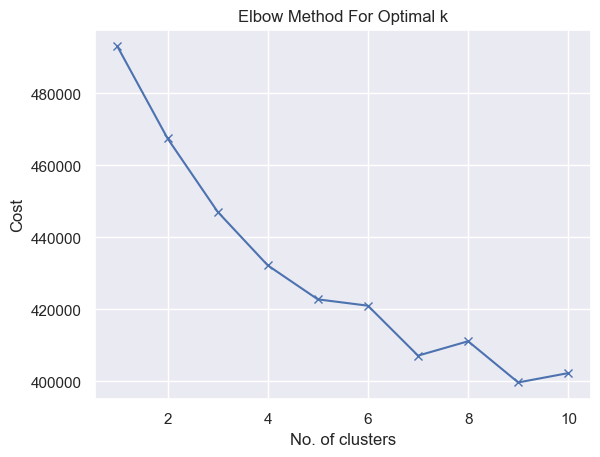

In [6]:
# Elbow curve to find optimal K
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data_scaled)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
kmodes = KModes(n_clusters = 9, init = "random", n_init = 5, verbose=1)
kmodes.fit_predict(data_scaled)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10670, cost: 416094.0
Run 1, iteration: 2/100, moves: 181, cost: 416085.0
Run 1, iteration: 3/100, moves: 4, cost: 416085.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 24964, cost: 416189.0
Run 2, iteration: 2/100, moves: 7232, cost: 416129.0
Run 2, iteration: 3/100, moves: 24, cost: 416129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 38848, cost: 402615.0
Run 3, iteration: 2/100, moves: 58, cost: 402615.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 37544, cost: 408962.0
Run 4, iteration: 2/100, moves: 452, cost: 408962.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 11849, cost: 414521.0
Run 5, iteration: 2/1

array([2, 3, 0, ..., 0, 3, 6], dtype=uint16)

In [8]:
df_non_int = data_scaled[pd.to_numeric(df['Violation Code'], errors='coerce').isna()]

# print the result with the non-integer values
for index, row in df_non_int.iterrows():
    print(f"Row {index} contains a non-integer value: {row['Violation Code']}")
    print(row)

In [9]:
labels = kmodes.labels_
data_scaled['Cluster'] = labels
data_scaled = data_scaled.astype({"Violation Code":"int","Cluster":"int"})

<Axes: xlabel='Longitude', ylabel='Latitude'>

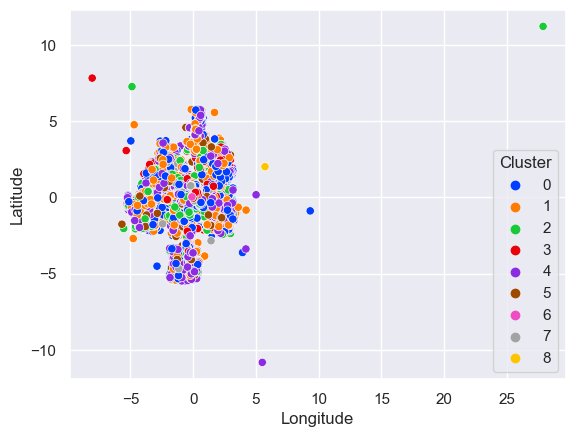

In [10]:
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=data_scaled, palette=palette)

In [11]:
Q1 = data_scaled[['Longitude', 'Latitude']].quantile(0.25)
Q3 = data_scaled[['Longitude', 'Latitude']].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows where either column is outside of the IQR range
df_filtered = data_scaled[~((data_scaled[['Longitude', 'Latitude']] < (Q1 - 1.5 * IQR)) | (data_scaled[['Longitude', 'Latitude']] > (Q3 + 1.5 * IQR))).any(axis=1)]


<Axes: xlabel='Longitude', ylabel='Latitude'>

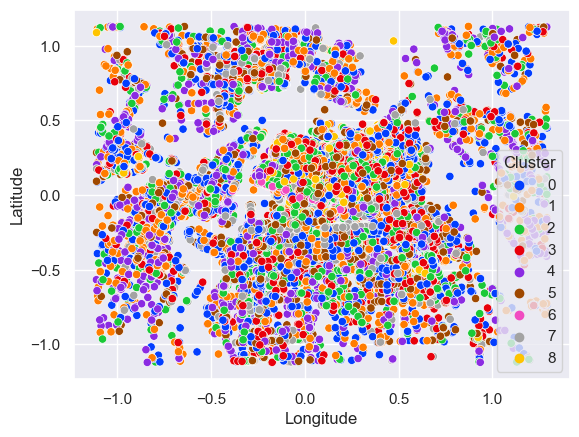

In [12]:
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df_filtered, palette=palette)

In [13]:
cluster_modes = data_scaled.groupby('Cluster').apply(lambda x: x.mode().iloc[0])
print(cluster_modes)

0        Longitude  Latitude        Day  Violation Code         Street  \
Cluster                                                                  
0         0.631288  0.165167     Monday              16    William AVE   
1        -0.504019  0.043270   Thursday               6    William AVE   
2         0.304521  0.143288     Friday               1    William AVE   
3         0.555881  0.177669    Tuesday               1  Bannatyne AVE   
4        -3.423979 -0.159891    Tuesday              39    William AVE   
5         0.388308 -0.347424  Wednesday               1       Furby ST   
6        -0.110222  0.027642  Wednesday               1     Kennedy ST   
7        -0.110222 -0.231779   Thursday               5      Spence ST   
8         0.040594  0.205799   Thursday               1       Smith ST   

0                        Time Range  Cluster  
Cluster                                       
0           Daytime (9:00am-3:30pm)        0  
1          Evening (5:00pm-11:00pm)        1

In [14]:
cluster_modes.to_csv("../Results/K-Modes_Cluster_Info.csv",index=False)

In [15]:
noLocdf = df[['Day', 'Violation Code', 'Street',"Time Range"]]
noLocdf

,Day,Violation Code,Street,Time Range
0,Friday,1,Donald ST,Daytime (9:00am-3:30pm)
1,Thursday,1,Bannatyne AVE,Daytime (9:00am-3:30pm)
2,Monday,13,Kennedy ST,Evening (5:00pm-11:00pm)
3,Tuesday,1,St Mary AVE,Daytime (9:00am-3:30pm)
4,Wednesday,1,Osborne ST,Daytime (9:00am-3:30pm)
...,...,...,...,...
99995,Wednesday,13,Vaughan ST,Daytime (9:00am-3:30pm)
99996,Thursday,1,Edmonton ST,Rush Hour Morning (7:30am-9:00am)
99997,Wednesday,3,William AVE,Rush Hour Morning (7:30am-9:00am)
99998,Tuesday,1,Pioneer AVE,Rush Hour Evening (3:30pm-5:00pm)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 293240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 293240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 293240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 293240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 293240.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12332, cost: 273805.0
Run 1, iteration: 2/100, moves: 1131, cost: 273805.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2860, cost: 272733.0
Init: in

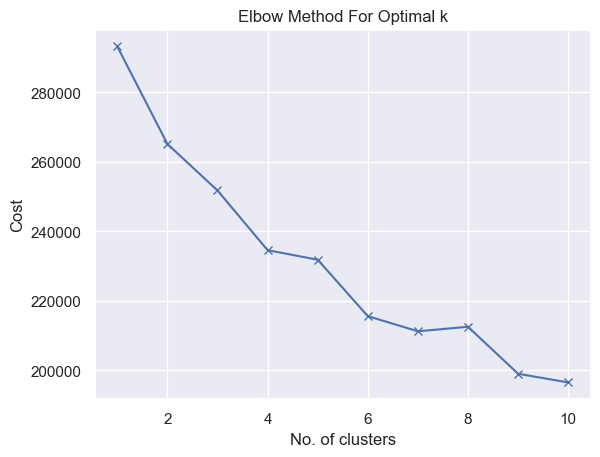

In [16]:
# Elbow curve to find optimal K
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(noLocdf)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
kmodes = KModes(n_clusters = 9, init = "random", n_init = 5, verbose=1)
kmodes.fit_predict(noLocdf)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 24575, cost: 216982.0
Run 1, iteration: 2/100, moves: 2731, cost: 216982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13076, cost: 202912.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 28092, cost: 210326.0
Run 3, iteration: 2/100, moves: 430, cost: 210326.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 26710, cost: 199770.0
Run 4, iteration: 2/100, moves: 925, cost: 199770.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 36958, cost: 205146.0
Run 5, iteration: 2/100, moves: 6766, cost: 204900.0
Run 5, iteration: 3/100, moves: 242, cost: 204900.0
Best run was number 4


array([5, 2, 0, ..., 0, 1, 2], dtype=uint16)

In [22]:
labels2 = kmodes.labels_
noLocdf['Cluster'] = labels2
noLocdf = noLocdf.astype({"Violation Code":"int","Cluster":"int"})
cluster_modes2 = noLocdf.groupby('Cluster').apply(lambda x: x.mode().iloc[0])
col = noLocdf.groupby('Cluster').agg(pd.Series.count)
cluster_modes2["Count"] = col["Day"]
cluster_modes2.to_csv("../Results/K-Modes_Cluster_Info2.csv",index=False)
print(cluster_modes2)

0              Day  Violation Code         Street                  Time Range  \
Cluster                                                                         
0           Sunday               6    William AVE    Evening (5:00pm-11:00pm)   
1          Tuesday               1    William AVE     Daytime (9:00am-3:30pm)   
2         Thursday               1    Hargrave ST     Daytime (9:00am-3:30pm)   
3           Monday               5       Furby ST     Daytime (9:00am-3:30pm)   
4        Wednesday               1  Bannatyne AVE     Daytime (9:00am-3:30pm)   
5           Friday               1   McDermot AVE     Daytime (9:00am-3:30pm)   
6         Saturday               6       Rorie ST     Daytime (9:00am-3:30pm)   
7        Wednesday              39      River AVE  Overnight (11:00pm-5:30am)   
8         Saturday              39    William AVE  Overnight (11:00pm-5:30am)   

0        Cluster  Count  
Cluster                  
0              0  15413  
1              1  20866  
2   

<Axes: xlabel='Longitude', ylabel='Latitude'>

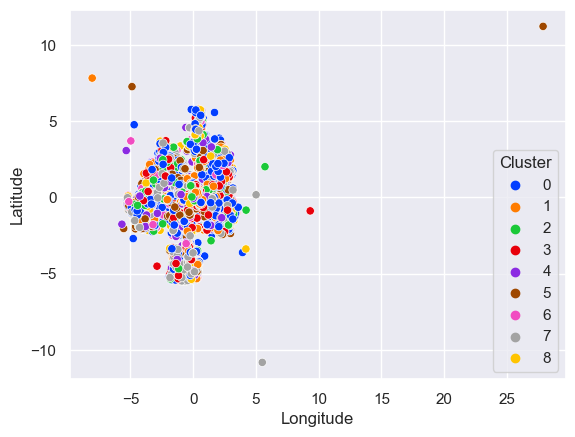

In [19]:
graphData = pd.concat([pd.DataFrame(numerical_data_scaled,columns=numerical_data.columns), noLocdf], axis=1)
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=graphData, palette=palette)

In [20]:
Q1 = graphData[['Longitude', 'Latitude']].quantile(0.25)
Q3 = graphData[['Longitude', 'Latitude']].quantile(0.75)
IQR = Q3 - Q1

# Filter out rows where either column is outside of the IQR range
df_filtered2 = graphData[~((graphData[['Longitude', 'Latitude']] < (Q1 - 1.5 * IQR)) | (graphData[['Longitude', 'Latitude']] > (Q3 + 1.5 * IQR))).any(axis=1)]


<Axes: xlabel='Longitude', ylabel='Latitude'>

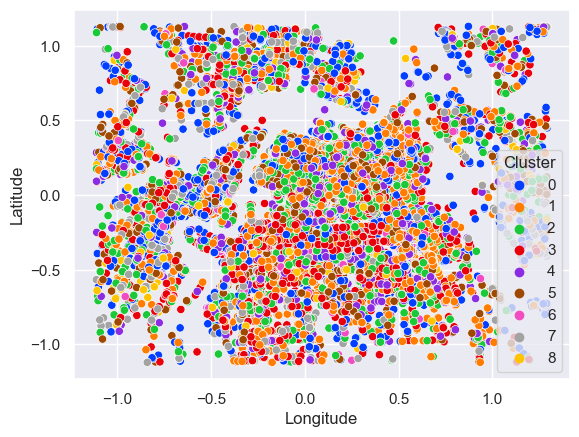

In [21]:
palette = sns.color_palette('bright', np.unique(labels).max() + 1)
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=df_filtered2, palette=palette)